In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import calendar

In [2]:
attacks_df = pd.read_csv('attacks_clean.csv')
attacks_df

,Unnamed: 0,Year,Month,Day,HH,MM,Country,Sex,Age,Activity,Type,Fatal (Y/N),Continent
0,0,2018,6.0,25.0,18,0.0,UNITED STATES,F,57.0,SURFING,BOATING,N,North America
1,1,2018,6.0,18.0,14,0.0,UNITED STATES,F,11.0,BATHING,UNPROVOKED,N,North America
2,2,2018,6.0,9.0,07,45.0,UNITED STATES,M,48.0,SURFING,INVALID,N,North America
3,3,2018,6.0,8.0,NaN,NaN,AUSTRALIA,M,NaN,SURFING,UNPROVOKED,N,Oceania
4,4,2018,6.0,4.0,NaN,NaN,MEXICO,M,NaN,DIVING,PROVOKED,N,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6310,6310,1959,12.0,11.0,NaN,NaN,AUSTRALIA,M,35.0,FISHING,PROVOKED,N,Oceania
6311,6311,1959,8.0,2.0,NaN,NaN,ITALY,M,19.0,DIVING,INVALID,NaN,Europe
6312,6312,1959,1.0,2.0,08,0.0,MOZAMBIQUE,M,26.0,SWIMMING,UNPROVOKED,Y,Africa
6313,6313,1947,1.0,14.0,NaN,NaN,AUSTRALIA,NaN,16.0,SMALLCRAFT,BOATING,N,Oceania


# Analysis

Let's start the analysis with a small and general introduccion on the evolution of the shark attacks, by continent, since 1900, as it is a year where the records could be more reliable. 

## Evolution by continent since 1900

In [3]:
n_america = attacks_df[attacks_df['Continent'] == 'North America']['Year'].value_counts().rename_axis('years').reset_index(name='counts')
s_america = attacks_df[attacks_df['Continent'] == 'South America']['Year'].value_counts().rename_axis('years').reset_index(name='counts')
africa = attacks_df[attacks_df['Continent'] == 'Africa']['Year'].value_counts().rename_axis('years').reset_index(name='counts')
europe = attacks_df[attacks_df['Continent'] == 'Europe']['Year'].value_counts().rename_axis('years').reset_index(name='counts')
asia = attacks_df[attacks_df['Continent'] == 'Asia']['Year'].value_counts().rename_axis('years').reset_index(name='counts')
oceania = attacks_df[attacks_df['Continent'] == 'Oceania']['Year'].value_counts().rename_axis('years').reset_index(name='counts')

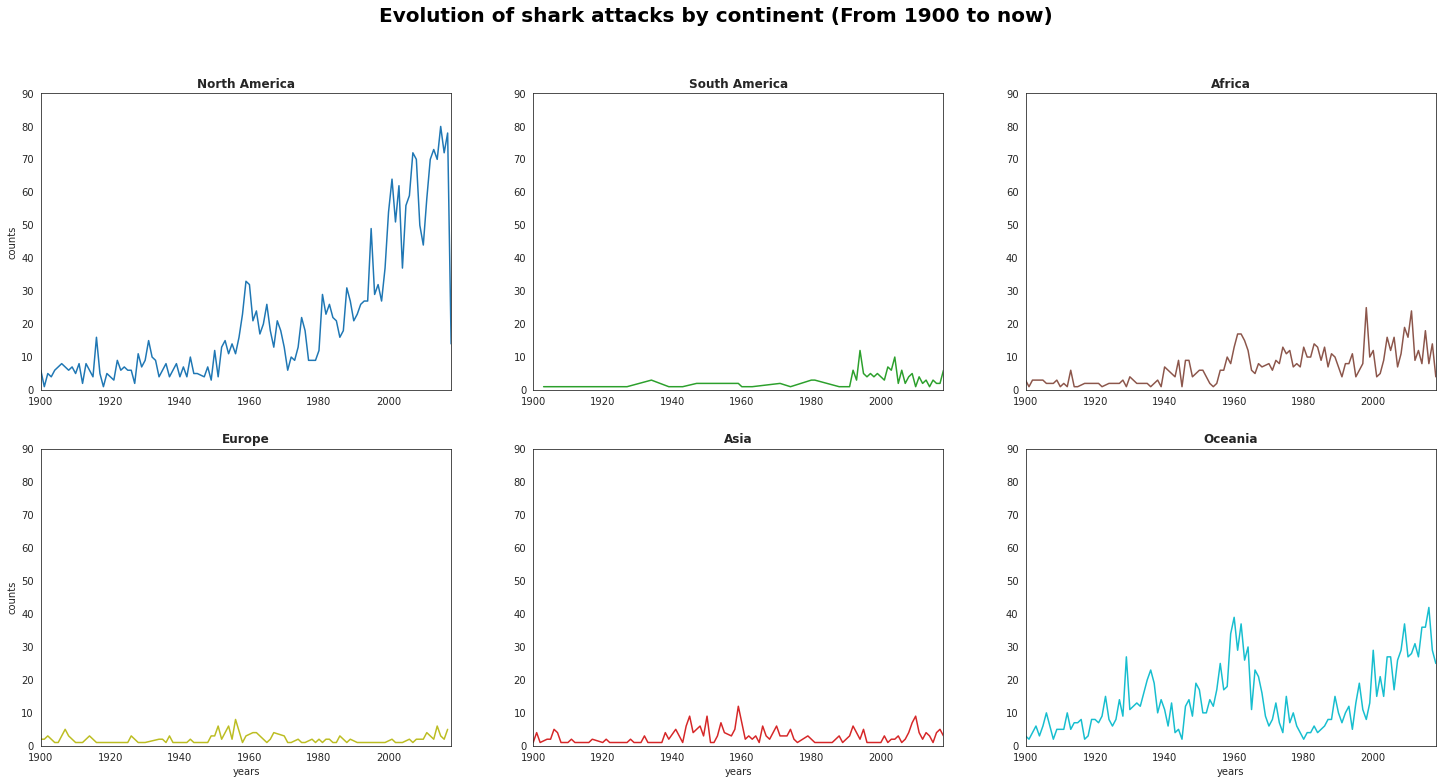

In [4]:
f = plt.figure(figsize=(25, 12))
gs = f.add_gridspec(2, 3)
f.suptitle('Evolution of shark attacks by continent (From 1900 to now)', fontsize=20, fontweight='bold', c='k')

with sns.axes_style("white"):
    ax = f.add_subplot(gs[0, 0])
    sns.lineplot(data=n_america[n_america['years'] >= 1900], x='years', y='counts', color='tab:blue').set_title('North America', fontweight='bold')
    ax.set(xlabel=None, ylim=(0,90), xlim=(1900,2018))
with sns.axes_style("white"):
    ax = f.add_subplot(gs[0, 1])
    sns.lineplot(data=s_america[s_america['years'] >= 1900], x='years', y='counts', color='tab:green').set_title('South America', fontweight='bold')
    ax.set(xlabel=None, ylabel=None, ylim=(0,90), xlim=(1900,2018))
with sns.axes_style("white"):
    ax = f.add_subplot(gs[0, 2])
    sns.lineplot(data=africa[africa['years'] >= 1900], x='years', y='counts', color='tab:brown').set_title('Africa', fontweight='bold')
    ax.set(xlabel=None, ylabel=None, ylim=(0,90), xlim=(1900,2018))
with sns.axes_style("white"):
    ax = f.add_subplot(gs[1, 0])
    sns.lineplot(data=europe[europe['years'] >= 1900], x='years', y='counts', color='tab:olive').set_title('Europe', fontweight='bold')
    ax.set(ylim=(0,90), xlim=(1900,2018))
with sns.axes_style("white"):
    ax = f.add_subplot(gs[1, 1])
    sns.lineplot(data=asia[asia['years'] >= 1900], x='years', y='counts', color='tab:red').set_title('Asia', fontweight='bold')
    ax.set(ylabel=None, ylim=(0,90), xlim=(1900,2018))
with sns.axes_style("white"):
    ax = f.add_subplot(gs[1, 2])    
    sns.lineplot(data=oceania[oceania['years'] >= 1900], x='years', y='counts', color='tab:cyan').set_title('Oceania', fontweight='bold')
    ax.set(ylabel=None, ylim=(0,90), xlim=(1900,2018))

As the plots shown, the continents with the largest numbers of shark attacks notified are North America, Oceanía and Africa. The evolution of the lines are pretty similar up till 1980. Each of the continents has a peak around the 60's, which is higher for Oceania. After this peak, a valley comes, more pronounced for Oceania and North America, and more stable for Africa. At some point in the 80's, Africa gets the highest number of shark attacks notified, and it sways between the growth and stability afterwards.

The real growth after the 80's came for North America, which increases from 10 notified cases to 80 in 3 decades. Similar evolution, but with less intensity, for Oceania, which goes from around 3 cases to nearly 40 in the same period. 

The reminder 3 continents have much lower numbers, with similar peaks of around 10 cases for Europe and Asia in the 60's; and a similar peak for South America around the mid 90's.

Let's see now how is the evolution of cases along the year, month by month, by continent.

In [5]:
n_america = attacks_df[attacks_df['Continent'] == 'North America']['Month'].value_counts().rename_axis('months').reset_index(name='counts')
n_america['months'] = n_america['months'].astype(int)
n_america.sort_values(by=['months'], inplace=True)
n_america['months'] = n_america['months'].apply(lambda x: calendar.month_abbr[x])

s_america = attacks_df[attacks_df['Continent'] == 'South America']['Month'].value_counts().rename_axis('months').reset_index(name='counts')
s_america['months'] = s_america['months'].astype(int)
s_america.sort_values(by=['months'], inplace=True)
s_america['months'] = s_america['months'].apply(lambda x: calendar.month_abbr[x])

africa = attacks_df[attacks_df['Continent'] == 'Africa']['Month'].value_counts().rename_axis('months').reset_index(name='counts')
africa['months'] = africa['months'].astype(int)
africa.sort_values(by=['months'], inplace=True)
africa['months'] = africa['months'].apply(lambda x: calendar.month_abbr[x])

europe = attacks_df[attacks_df['Continent'] == 'Europe']['Month'].value_counts().rename_axis('months').reset_index(name='counts')
europe['months'] = europe['months'].astype(int)
europe.sort_values(by=['months'], inplace=True)
europe['months'] = europe['months'].apply(lambda x: calendar.month_abbr[x])

asia = attacks_df[attacks_df['Continent'] == 'Asia']['Month'].value_counts().rename_axis('months').reset_index(name='counts')
asia['months'] = asia['months'].astype(int)
asia.sort_values(by=['months'], inplace=True)
asia['months'] = asia['months'].apply(lambda x: calendar.month_abbr[x])

oceania = attacks_df[attacks_df['Continent'] == 'Oceania']['Month'].value_counts().rename_axis('months').reset_index(name='counts')
oceania['months'] = oceania['months'].astype(int)
oceania.sort_values(by=['months'], inplace=True)
oceania['months'] = oceania['months'].apply(lambda x: calendar.month_abbr[x])

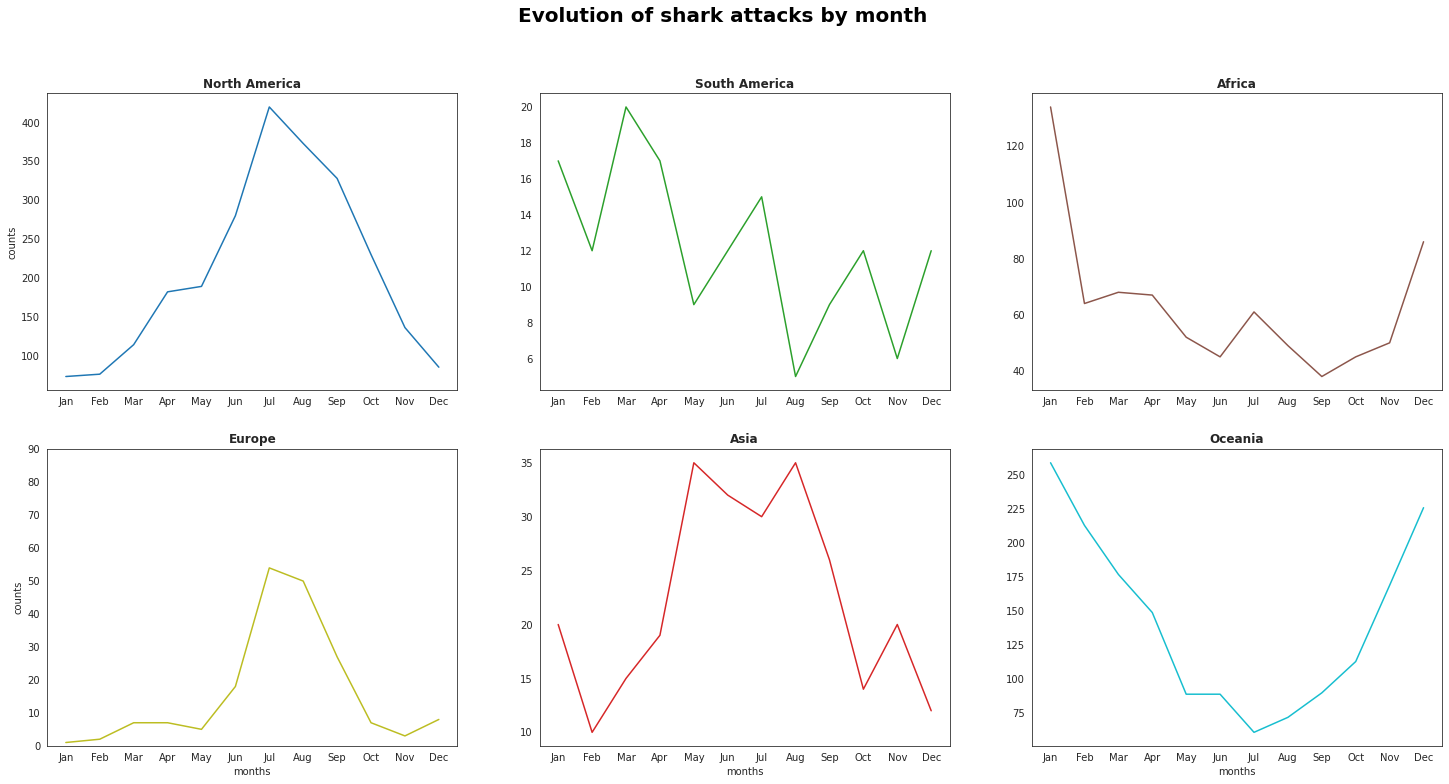

In [6]:
f = plt.figure(figsize=(25, 12))
gs = f.add_gridspec(2, 3)
f.suptitle('Evolution of shark attacks by month', fontsize=20, fontweight='bold', c='k')

with sns.axes_style("white"):
    ax = f.add_subplot(gs[0, 0])
    sns.lineplot(data=n_america, x='months', y='counts', color='tab:blue').set_title('North America', fontweight='bold')
    ax.set(xlabel=None)
with sns.axes_style("white"):
    ax = f.add_subplot(gs[0, 1])
    sns.lineplot(data=s_america, x='months', y='counts', color='tab:green').set_title('South America', fontweight='bold')
    ax.set(xlabel=None, ylabel=None)
with sns.axes_style("white"):
    ax = f.add_subplot(gs[0, 2])
    sns.lineplot(data=africa, x='months', y='counts', color='tab:brown').set_title('Africa', fontweight='bold')
    ax.set(xlabel=None, ylabel=None)
with sns.axes_style("white"):
    ax = f.add_subplot(gs[1, 0])
    sns.lineplot(data=europe, x='months', y='counts', color='tab:olive').set_title('Europe', fontweight='bold')
    ax.set(ylim=(0,90))
with sns.axes_style("white"):
    ax = f.add_subplot(gs[1, 1])
    sns.lineplot(data=asia, x='months', y='counts', color='tab:red').set_title('Asia', fontweight='bold')
    ax.set(ylabel=None)
with sns.axes_style("white"):
    ax = f.add_subplot(gs[1, 2])    
    sns.lineplot(data=oceania, x='months', y='counts', color='tab:cyan').set_title('Oceania', fontweight='bold')
    ax.set(ylabel=None)

No surpirses from this plots, as all the peaks match with the summer seasons in each of the continents: North America registers more than 400 cases in July, Europe around 60, and Asia 35 around May and August; whilst Africa and Oceania get the peaks in January and December: Oceania gets more than 250 and africa nearly 140. The line behaves stranger in South America, with a peak in March, and some intercalated periods of growth and decrease.

Let's check now on the distribution of ages and sex by continent.

<AxesSubplot:xlabel='Age', ylabel='Continent'>

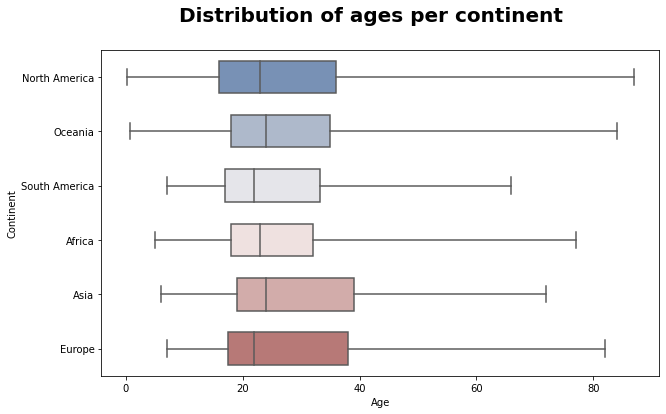

In [7]:
f, ax = plt.subplots(figsize=(10, 6))
f.suptitle('Distribution of ages per continent', fontsize=20, fontweight='bold', c='k')
sns.boxplot(x="Age", y="Continent", data=attacks_df, whis=[0, 100], width=.6, palette="vlag")

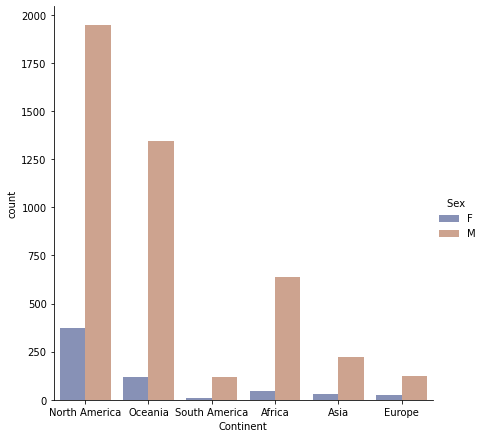

In [8]:
sns.catplot(data=attacks_df[attacks_df['Year'] >= 1900], kind="count", x="Continent", hue="Sex ", ci="sd", palette="dark", alpha=.5, height=6)

As the top plot shows, the ranges of ages are pretty similar among the continents: wider for North America, Oceania (from 0 to 80) and Europe, and shorter for Asia and South America. Most of the cases comprehend the range between 20 years and 40 years old. I would like to highlight that the two middle quartiles in North America begin at nearly 16-17 years old; and the ones in Asia finish at nearly 40 years old. This could happen due to a kind of turism where water-sports are really typical. Europe's quartiles are the widest, while Africa's are the thinest.

About the sex distribution of the plot bottom plot, attacks with men involved are generally more numerous in each of the continents in comparison to attacks with women involved (around 80-20%).

Let's finish this general analysis checking on the distribution of activities (what people were doing when the attack took place) by continent.

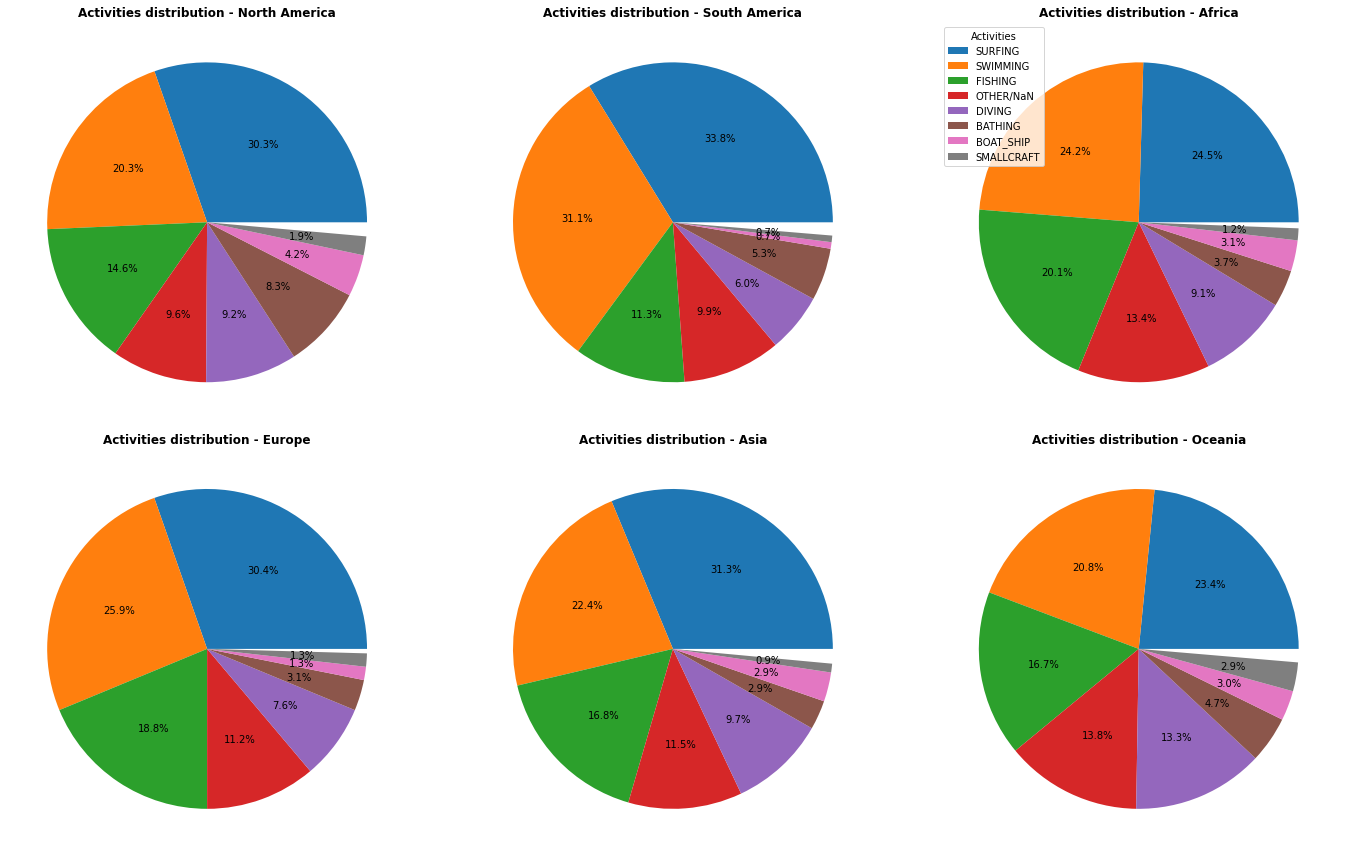

In [9]:
n_america = attacks_df[attacks_df['Continent'] == 'North America']['Activity'].value_counts(normalize=True).rename_axis('activity').reset_index(name='counts')
s_america = attacks_df[attacks_df['Continent'] == 'South America']['Activity'].value_counts(normalize=True).rename_axis('activity').reset_index(name='counts')
africa = attacks_df[attacks_df['Continent'] == 'Africa']['Activity'].value_counts(normalize=True).rename_axis('activity').reset_index(name='counts')
europe = attacks_df[attacks_df['Continent'] == 'Europe']['Activity'].value_counts(normalize=True).rename_axis('activity').reset_index(name='counts')
asia = attacks_df[attacks_df['Continent'] == 'Asia']['Activity'].value_counts(normalize=True).rename_axis('activity').reset_index(name='counts')
oceania = attacks_df[attacks_df['Continent'] == 'Oceania']['Activity'].value_counts(normalize=True).rename_axis('activity').reset_index(name='counts')

fig = plt.figure(figsize=(20,12))

ax1 = fig.add_subplot(2,3,1)
plt.pie(x=n_america['counts'][:8], autopct='%1.1f%%')
ax1.set_title('Activities distribution - North America', fontweight='bold')

ax2 = fig.add_subplot(2,3,2)
plt.pie(x=s_america['counts'][:8], autopct='%1.1f%%')
ax2.set_title('Activities distribution - South America', fontweight='bold')

ax3 = fig.add_subplot(2,3,3)
plt.pie(x=africa['counts'][:8], autopct='%1.1f%%')
ax3.legend(n_america['activity'], title='Activities', loc='upper left')
ax3.set_title('Activities distribution - Africa', fontweight='bold')

ax4 = fig.add_subplot(2,3,4)
plt.pie(x=europe['counts'][:8], autopct='%1.1f%%')
ax4.set_title('Activities distribution - Europe', fontweight='bold')

ax5 = fig.add_subplot(2,3,5)
plt.pie(x=asia['counts'][:8], autopct='%1.1f%%')
ax5.set_title('Activities distribution - Asia', fontweight='bold')

ax6 = fig.add_subplot(2,3,6)
plt.pie(x=oceania['counts'][:8], autopct='%1.1f%%')
ax6.set_title('Activities distribution - Oceania', fontweight='bold')
plt.tight_layout()

The top 3 activities for each of the continents are Surfing, Swimming and Fishing. No surprises on that anyway, but is really interesting how low is the portion of people who was performing some kind of diving when suffered the attack. 7.6 and 9.7% for Europe and Asia (where diving is a typical activity); or less than 10% for North America and Africa.

Is a bit higher in Oceania, where curiously, the portion of people surfing is lower than in any other continent.

## Fatalities since 1900

Once the general approach is done, is time to focuse the analysis in the number of fatalities produced by shark attacks. Let's start comparing this measure by continent.

### Fatalities/No fatalities by continent

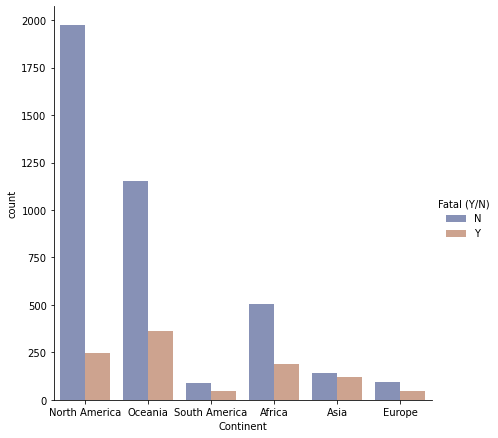

In [10]:
sns.catplot(data=attacks_df[attacks_df['Year'] >= 1900], kind="count", x="Continent", hue="Fatal (Y/N)", ci="sd", palette="dark", alpha=.5, height=6, ax=ax1)

Happily non of the continents has more fatalities than no-fatalities. The difference between this two measures is really big for North America (around 80-20%), Oceania and Africa (both around 70-30%). Nonetheless, on continents that usually have lower number of cases reported the difference between this two marks is more narrow: Asia could be around 55-45%, and South America around 60-40%. This means that even though there are less cases, those are much deadly.

### Fatalities/No fatalities by activity and type

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'SURFING'),
  Text(1, 0, 'BATHING'),
  Text(2, 0, 'DIVING'),
  Text(3, 0, 'SWIMMING'),
  Text(4, 0, 'FISHING'),
  Text(5, 0, 'WORKING'),
  Text(6, 0, 'OTHER/NaN'),
  Text(7, 0, 'SMALLCRAFT'),
  Text(8, 0, 'BOAT_SHIP'),
  Text(9, 0, 'STRANGE_DUMB'),
  Text(10, 0, 'PLANE'),
  Text(11, 0, 'SPEARFISHING')])

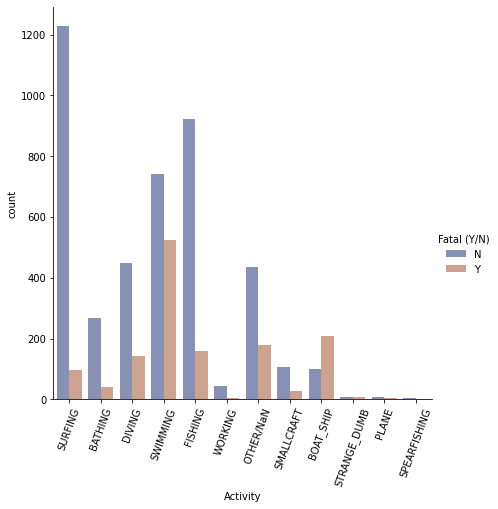

In [11]:
sns.catplot(data=attacks_df, kind="count", x="Activity", hue="Fatal (Y/N)", ci="sd", palette="dark", alpha=.5, height=6)
plt.xticks(rotation=70)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'BOATING'),
  Text(1, 0, 'UNPROVOKED'),
  Text(2, 0, 'INVALID'),
  Text(3, 0, 'PROVOKED'),
  Text(4, 0, 'QUESTIONABLE'),
  Text(5, 0, 'SEA DISASTER')])

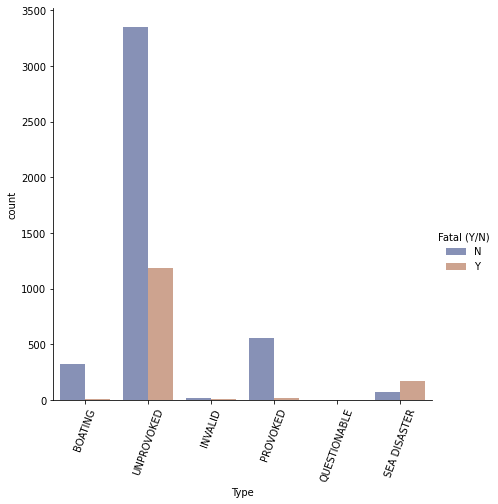

In [12]:
sns.catplot(data=attacks_df, kind="count", x="Type", hue="Fatal (Y/N)", ci="sd", palette="dark", alpha=.5, height=6)
plt.xticks(rotation=70)

As the plot shows, the deadliest activity by far is swimming, followed by sailing, fishing and diving. Unlike movies tend to tell us, surfers are kind of good avoiding shark attacks, or maybe the board really helps when fighting against this animals. It stands out the low number of people who dies while working (doing activities other than fishing) or spearfishing.

About the type of attack, the deadliest kinds of events are either unprovoked or related to a sea disaster, which means that people tend to avoid the confrontation with a shark or activities that could bring that up.

### Fatalities by year and continent

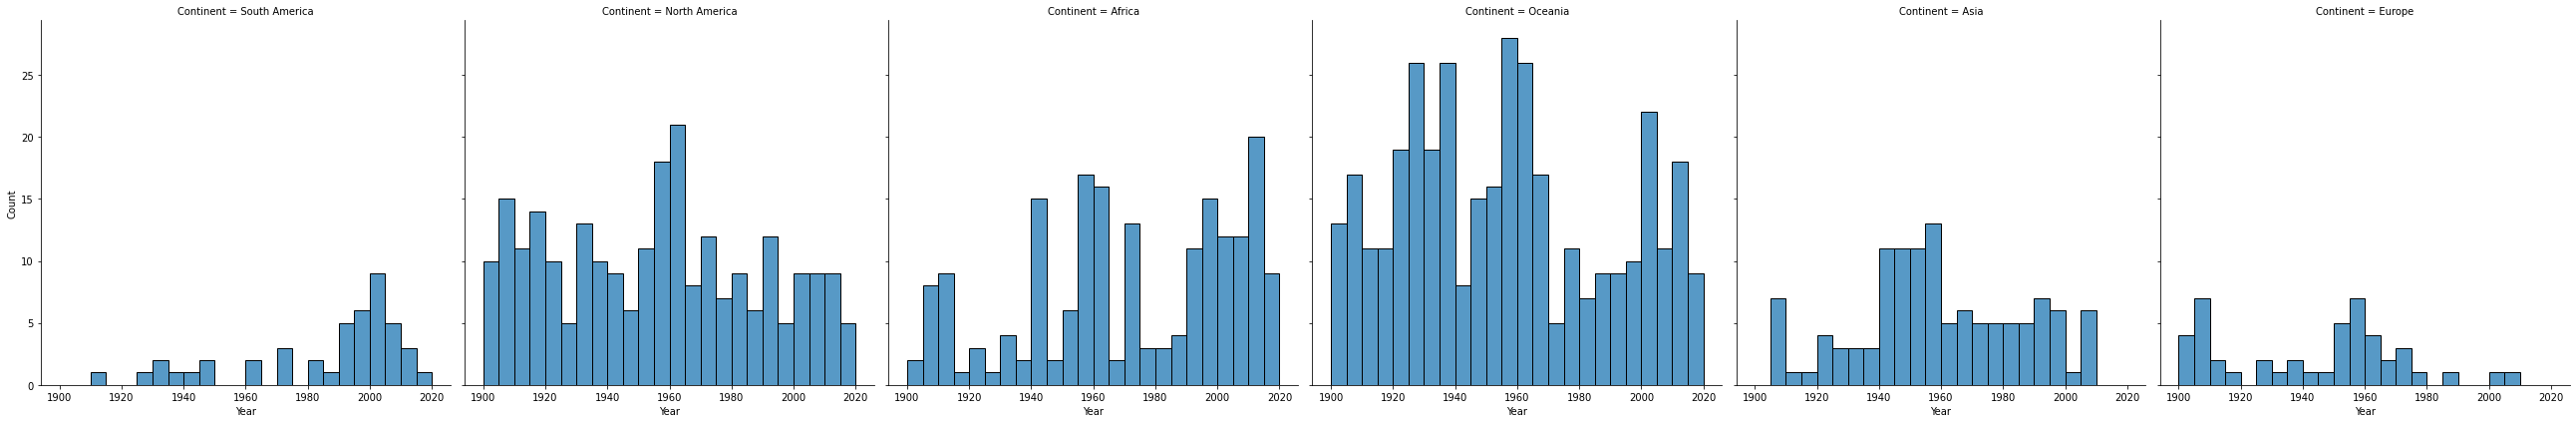

In [13]:
fatals = attacks_df[(attacks_df['Year'] >= 1900) & (attacks_df['Fatal (Y/N)'] == 'Y')]
sns.displot(fatals, x='Year', col='Continent', binwidth=5, height=6, facet_kws=dict(margin_titles=True))

The continent where more deaths by shark attack where registered along the last century is Oceania, with some really difficult decades around the 30's (maybe due to the migration movements) the 60's and around 2000. Is followed not too close by North Amreica, with a pronounced peak in the 60's, but a decline in the last decades. Opposite to that decline is Africa, were the death tool has been rising since the 80's, as it also had a peak in the 60's. 

Same peaks for Europe and Asia, but both have been more stable in this aspect on the last decades; and different in South America, where it happened around 2000.

### Fatalities by age

<AxesSubplot:xlabel='ages', ylabel='counts'>

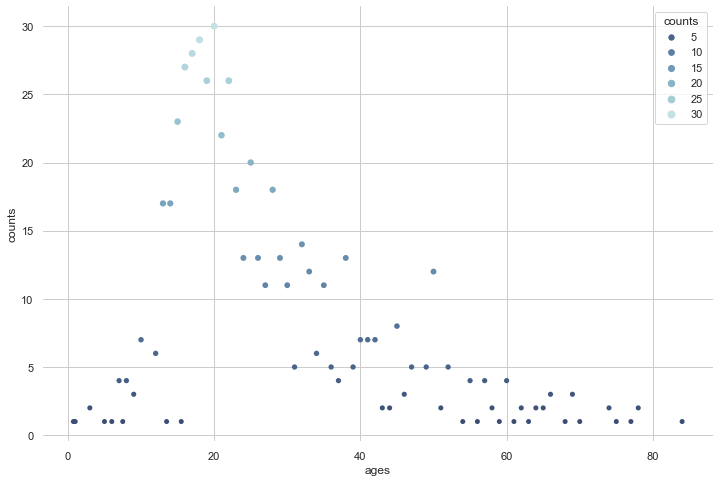

In [14]:
fatals_age = fatals['Age'].value_counts().rename_axis('ages').reset_index(name='counts')
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(12, 8))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(data=fatals_age, x='ages', y='counts', hue="counts", size="counts", palette="ch:r=-.2,d=.3_r", hue_order=clarity_ranking, sizes=(25, 50), linewidth=0, ax=ax)

As the scatter shows, there is a positive relationship between age and fatalities (the older people is, the more deaths are registered for that age) up till the age of 20, where it gets a peak of 30 deaths. From there, the relationship turns negative, se we can say that from your 20's, the older you get, the less likely is for you to suffer a shark attack. 

### Distribution of fatalities by sex

Text(0.5, 1.0, 'Fatals distribution by sex')

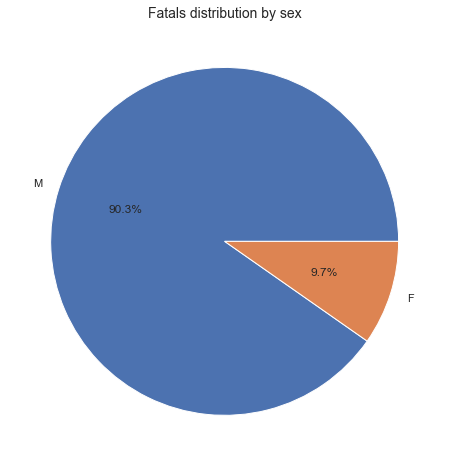

In [15]:
fatals_sex = fatals['Sex '].value_counts(normalize=True).rename_axis('sex').reset_index(name='counts')

f, ax = plt.subplots(figsize=(12, 8))
ax.pie(x=fatals_sex['counts'], labels=fatals_sex['sex'], autopct='%1.1f%%')
ax.set_title("Fatals distribution by sex", fontsize=14)

By last, the distribution of fatalities by sex shows us that 9 out of 10 fatal shark attacks are suffered by men. So we can conclude that the continent you are in, the activity you develop, your age and your sex could determine whether you live or die in case you suffer a shark attack. 